In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

In [3]:
batch_size=32
image_size=256
channels=3
epochs=10

In [20]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "train/train",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size)

Found 16854 files belonging to 33 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Cantaloupe


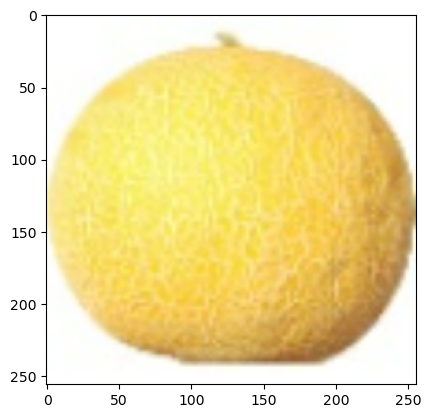

In [14]:
class_names=train_ds.class_names
len(class_names)

33

In [6]:
test_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "test",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size)

Found 5641 files belonging to 1 classes.


In [7]:
train=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [23]:
augmentation=tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1.0/255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3)])

In [26]:
input_shape=(batch_size,image_size,image_size,channels)
model=keras.Sequential([
    augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(33,activation="softmax")
])

C:\Users\Ghanathey Akash\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.build(input_shape=input_shape)

NameError: name 'model' is not defined

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 12544)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 33)                    │           2,145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 861,377 (3.29 MB)

 Trainable params: 861,377 (3.29 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [32]:
model.fit(
    train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1)

Epoch 1/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 496s 936ms/step - accuracy: 0.5912 - loss: 1.3643
Epoch 2/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 507s 962ms/step - accuracy: 0.9615 - loss: 0.1141
Epoch 3/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 514s 975ms/step - accuracy: 0.9823 - loss: 0.0570
Epoch 4/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 503s 955ms/step - accuracy: 0.9905 - loss: 0.0320
Epoch 5/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 497s 944ms/step - accuracy: 0.9844 - loss: 0.0540
Epoch 6/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 493s 935ms/step - accuracy: 0.9823 - loss: 0.0533
Epoch 7/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 503s 955ms/step - accuracy: 0.9810 - loss: 0.0712
Epoch 8/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 503s 954ms/step - accuracy: 0.9956 - loss: 0.0126
Epoch 9/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 494s 937ms/step - accuracy: 0.9955 - loss: 0.0154
Epoch 10/10
527/527 ━━━━━━━━━━━━━━━━━━━━ 495s 939ms/step - accuracy: 0.9934 - loss: 0.0227


In [33]:
model.save("fruit_model.keras")

In [9]:
loaded_model=tf.keras.models.load_model("fruit_model.keras")

In [47]:
predicted=loaded_model.predict(test)

177/177 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step


In [48]:
predicted.shape

(5641, 33)

Found 200 files belonging to 5 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Tomato


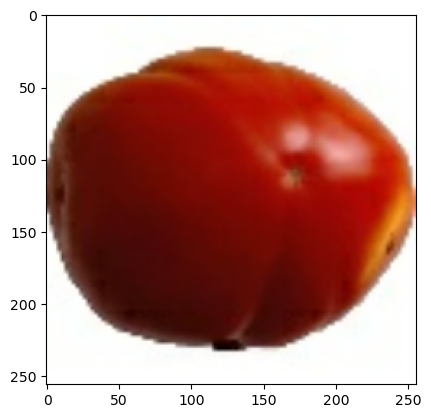

In [87]:
import numpy as np
for image,label in test.take(1):
    firstimage=image[0].numpy().astype('uint8')
    firstlabel=label[0].numpy()
    plt.imshow(firstimage)
    prediction=loaded_model.predict(image)
    print(class_names[np.argmax(prediction[0])])
